<a href="https://colab.research.google.com/github/pabloinsente/CovNet_Human_Drawings/blob/master/code/baseline_binary_classification_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baseline for binary classification of child/adult from drawings with PCA vectors

##Data Preparation

In [0]:
!pip install rarfile

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE 

import rarfile, csv

from numpy import genfromtxt
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [0]:
# Clone the data into Colab
! git clone https://github.com/pabloinsente/CovNet_Human_Drawings

In [11]:
# Read csv files from compressed rar file and convert into a dataframe
rar_path = rarfile.RarFile("CovNet_Human_Drawings/data/merged_dataframes_prediction/x_drawings_features_max_pool_5.rar")
csv_file_name = "x_drawings_features_max_pool_5.csv"
rar_file = rarfile.RarFile.open(rar_path, csv_file_name)
x = pd.read_csv(rar_file, sep=",", header=None)
print(x.shape)
print(x.iloc[0:5,0:5])

(258, 25088)
          0    1    2         3         4
0 -0.001317  0.0  0.0 -0.001322 -0.003181
1 -0.001052  0.0  0.0 -0.001056 -0.002540
2 -0.001176  0.0  0.0 -0.001181 -0.002840
3 -0.000836  0.0  0.0 -0.000839 -0.000957
4 -0.001163  0.0  0.0 -0.001168  0.011156


In [13]:
# Read labels vector
y_path = 'CovNet_Human_Drawings/data/merged_dataframes_prediction/y_age_adult_labels.csv'
y = genfromtxt(y_path, delimiter=',')

#x = x.drop([0]) # drop headers
print(y.shape)
print(y[0:5])

(258,)
[0. 0. 0. 0. 0.]


##PCA

In [0]:
from sklearn.decomposition import PCA
import numpy as np

Text(0, 0.5, 'Cumulative explained variance')

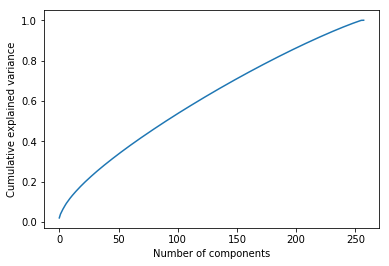

In [17]:
# Let's print out the accumulated explained variance as we get
# more components using PCA 

pca = PCA(n_components=x.shape[0])
pca.fit(x)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [18]:
NCOMPONENTS = 200

pca = PCA(n_components=NCOMPONENTS)
x_pca = pca.fit_transform(x)
x = x_pca
x.shape

(258, 200)

In [19]:
# Split data into train and test sets
# Since we have an small sample, we will do a 70/30 split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=44, stratify=y)
print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape)

(180, 200)
(180,)
(78, 200)
(78,)


##Resampling Imbalanced Data
Since our classes are imbalanced, we will use oversampling of the "adult" class **on the training set**  to help training on that class. *imblearn* implement oversampling for us

**See documentantion at** https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html

In [20]:
#ros = RandomOverSampler(random_state=42)
ros = SMOTE(random_state=42)

x_train_res, y_train_res = ros.fit_resample(x_train, y_train)
print(x_train_res.shape) # (258, 200)
print(y_train_res.shape) # (258,)
print('Resampled dataset shape %s' % Counter(y_train_res))

# Now we have 50/50 balanced classes

(290, 200)
(290,)
Resampled dataset shape Counter({0.0: 145, 1.0: 145})


Resampled dataset shape Counter({0.0: 145, 1.0: 145})


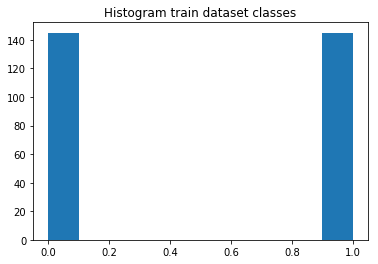

In [21]:
x_train = x_train_res
y_train = y_train_res
print('Resampled dataset shape %s' % Counter(y_train))
plt.hist(y_train, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram train dataset classes")
plt.show()

Test dataset shape Counter({0.0: 63, 1.0: 15})


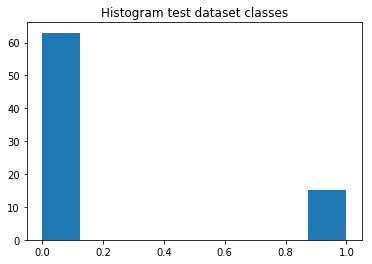

In [22]:
print('Test dataset shape %s' % Counter(y_test))
plt.hist(y_test, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram test dataset classes")
plt.show()

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

###Train logistic regression

In [24]:
# Train classifier
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(x_train, y_train)
y_pred = log_classifier.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###Test logistic regression

In [25]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.7692307692307693 

Confusion Matrix 
 [[59  4]
 [14  1]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.81      0.94      0.87        63
       Adult       0.20      0.07      0.10        15

   micro avg       0.77      0.77      0.77        78
   macro avg       0.50      0.50      0.48        78
weighted avg       0.69      0.77      0.72        78



##Suport Vector Machine

In [0]:
from sklearn.svm import SVC

###Training support vector machine

In [0]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train) 
y_pred = svm.predict(x_test)

###Testing support vector machine

In [28]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.7692307692307693 

Confusion Matrix 
 [[60  3]
 [15  0]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.80      0.95      0.87        63
       Adult       0.00      0.00      0.00        15

   micro avg       0.77      0.77      0.77        78
   macro avg       0.40      0.48      0.43        78
weighted avg       0.65      0.77      0.70        78



##Decision Tree

In [0]:
from sklearn import tree

###Training decision tree

In [0]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(x_train, y_train) 
y_pred = d_tree.predict(x_test)

###Testing decision tree

In [31]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.6538461538461539 

Confusion Matrix 
 [[45 18]
 [ 9  6]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.83      0.71      0.77        63
       Adult       0.25      0.40      0.31        15

   micro avg       0.65      0.65      0.65        78
   macro avg       0.54      0.56      0.54        78
weighted avg       0.72      0.65      0.68        78



##Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

###Training Naive Bayes

In [0]:
bayes = GaussianNB()
bayes.fit(x_train, y_train) 
y_pred = bayes.predict(x_test)

###Testing Naive Bayes

In [34]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.7564102564102564 

Confusion Matrix 
 [[58  5]
 [14  1]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.81      0.92      0.86        63
       Adult       0.17      0.07      0.10        15

   micro avg       0.76      0.76      0.76        78
   macro avg       0.49      0.49      0.48        78
weighted avg       0.68      0.76      0.71        78



## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

###Training Random Forest

In [0]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train) 
y_pred = forest.predict(x_test)

###Testing Random Forest

In [37]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.7948717948717948 

Confusion Matrix 
 [[62  1]
 [15  0]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.81      0.98      0.89        63
       Adult       0.00      0.00      0.00        15

   micro avg       0.79      0.79      0.79        78
   macro avg       0.40      0.49      0.44        78
weighted avg       0.65      0.79      0.72        78



##Gradient Boosting Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

###Training Gradient Boosting Classifier

In [0]:
boosting = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1)
boosting.fit(x_train, y_train) 
boosting = forest.predict(x_test)

###Testing Gradient Boosting Classifier

In [40]:
# Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy", "\n", acc, "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", "\n", cm, "\n")

# Classification report
target_names = ['Child', 'Adult']
cr = classification_report(y_test, y_pred, target_names=target_names)
print("Calssification report", "\n", cr)

Accuracy 
 0.7948717948717948 

Confusion Matrix 
 [[62  1]
 [15  0]] 

Calssification report 
               precision    recall  f1-score   support

       Child       0.81      0.98      0.89        63
       Adult       0.00      0.00      0.00        15

   micro avg       0.79      0.79      0.79        78
   macro avg       0.40      0.49      0.44        78
weighted avg       0.65      0.79      0.72        78

